# Mercedes Thompson Navigates the Sky!!

In [1]:
#Look at your file. Cause how else you gonna read this thing in?

!head quasars3.txt



Results from heasarc_milliquas: Million Quasars Catalog (MILLIQUAS), Version 6.0 (15 March 2019)
Coordinate system:  Equatorial
|name                     |ra         |dec        |
|WISEA J055431.47-431632.4|05 54 31.48|-43 16 32.5|
|WISEA J095244.92-431631.2|09 52 44.93|-43 16 31.3|
|WISEA J050310.49-431630.1|05 03 10.49|-43 16 30.1|
|WISEA J200949.47-431629.9|20 09 49.48|-43 16 30.0|
|WISEA J130532.19-431629.1|13 05 32.20|-43 16 29.2|


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from astroplan import Observer
from astroplan import moon_illumination
from astroplan import observability_table, FixedTarget
from astroplan import Constraint, AltitudeConstraint, AirmassConstraint, AtNightConstraint, MoonSeparationConstraint
from astroplan import is_observable, is_always_observable, months_observable
from astroplan.utils import time_grid_from_range

from astropy import coordinates
from astropy.time import Time
from astroplan.plots import plot_airmass, dark_style_sheet
from astropy.coordinates import EarthLocation, get_sun, get_body, get_moon, SkyCoord
import astropy.units as u
from astropy.table import Table

In [4]:
quasars=pd.read_fwf('quasars3.txt', skiprows=4, delimiter='|')
quasars.columns = [c.strip() for c in quasars.columns]
quasars[0:5]

,name,ra,dec
0,WISEA J055431.47-431632.4,05 54 31.48,-43 16 32.5
1,WISEA J095244.92-431631.2,09 52 44.93,-43 16 31.3
2,WISEA J050310.49-431630.1,05 03 10.49,-43 16 30.1
3,WISEA J200949.47-431629.9,20 09 49.48,-43 16 30.0
4,WISEA J130532.19-431629.1,13 05 32.20,-43 16 29.2


# Where are we? 


The Du Pont 2.5 optical Telescope housed at Las Campanas Observatory in Chile's Atacama Desert.

In [5]:
lco = Observer.at_site('lco')
lco

/bin/sh: -c: line 0: syntax error near unexpected token `img/picture.png'
/bin/sh: -c: line 0: `[title](img/picture.png)'


<Observer: name='lco',
    location (lon, lat, el)=(-70.70166666666665 deg, -29.003333333333327 deg, 2281.9999999994607 m),
    timezone=<UTC>>

# When will we look?

In [6]:
observation_range = Time(["2019-05-15", "2019-05-30"])

beginning = Time(["2019-05-15"])
end = Time(["2019-05-30"])

window_range=[beginning, end]
window_time_grid=time_grid_from_range(window_range, time_resolution=24*u.hour)

# What can we see?

In [7]:
# Set constraints to optimize observations
constraints = [AirmassConstraint(1.5), AtNightConstraint.twilight_astronomical(), MoonSeparationConstraint(35*u.deg)]

#Pull table values 
table_values = quasars.values

#Set coordinates for targets
targets = [FixedTarget(coord = SkyCoord(RA, DEC, unit=[u.hourangle,u.deg]), name = Name)
           for Name, RA, DEC in table_values]

#Constrain targets
observing_table = observability_table(constraints, lco, targets, time_range = observation_range)
observing_table

#Find what is observable and optimize for the longest observation window e.g. our top ten!
mask1 = (observing_table['ever observable'] == True) & (observing_table['fraction of time observable'] >= .2375)
observable1 = observing_table[mask1]
observable2 = observable1.to_pandas()
observable = observable2.drop([observable2.index[6]]).reset_index(drop=True)
observable

,target name,ever observable,always observable,fraction of time observable
0,WISEA J130532.19-431629.1,True,False,0.270833
1,WISEA J125759.35-431627.0,True,False,0.265278
2,WISEA J122754.06-431626.5,True,False,0.244444
3,WISEA J134136.66-431624.0,True,False,0.295833
4,WISEA J140608.56-431610.3,True,False,0.283333
5,WISEA J131601.61-431606.1,True,False,0.277778
6,WISEA J121753.42-431553.6,True,False,0.237500
7,WISEA J150803.55-431536.1,True,False,0.259722
8,WISEA J125448.19-431525.8,True,False,0.262500
9,WISEA J144407.40-431524.6,True,False,0.277778


In [8]:
#Top ten with RA and DEC added.
result = pd.merge(observable, quasars, left_on='target name', right_on='name', left_index=True)
result1 = result.drop(['name', 'ever observable', 'always observable'], axis=1)
result1

,target name,fraction of time observable,ra,dec
4,WISEA J130532.19-431629.1,0.270833,13 05 32.20,-43 16 29.2
6,WISEA J125759.35-431627.0,0.265278,12 57 59.36,-43 16 27.1
8,WISEA J122754.06-431626.5,0.244444,12 27 54.07,-43 16 26.5
10,WISEA J134136.66-431624.0,0.295833,13 41 36.67,-43 16 24.1
30,WISEA J140608.56-431610.3,0.283333,14 06 08.57,-43 16 10.4
38,WISEA J131601.61-431606.1,0.277778,13 16 01.62,-43 16 06.2
52,WISEA J121753.42-431553.6,0.237500,12 17 53.43,-43 15 53.7
74,WISEA J150803.55-431536.1,0.259722,15 08 03.56,-43 15 36.2
87,WISEA J125448.19-431525.8,0.262500,12 54 48.19,-43 15 25.9
88,WISEA J144407.40-431524.6,0.277778,14 44 07.41,-43 15 24.6


# The Moon can get in the way!

In [69]:
#Observation dates
dates = np.arange('2019-05-15', '2019-05-31', dtype='datetime64[D]')

#Phase of the moon across our dates. Given in rad. 0rad = full moon and pi = new moon.
moon_phase = lco.moon_phase(dates)
moon_phase 

<Quantity [0.88831637, 0.6586472 , 0.43176186, 0.21192157, 0.07238651,
           0.24816147, 0.45501737, 0.65920405, 0.85897168, 1.05458923,
           1.24694396, 1.43723874, 1.6268483 , 1.81721446, 2.00975029,
           2.20574009] rad>

Where is the moon?

In [68]:
moon_position = lco.moon_altaz(dates1)
moon_position

<SkyCoord (AltAz: obstime=['2019-05-15T00:00:00.000000000' '2019-05-16T00:00:00.000000000'
 '2019-05-17T00:00:00.000000000' '2019-05-18T00:00:00.000000000'
 '2019-05-19T00:00:00.000000000' '2019-05-20T00:00:00.000000000'
 '2019-05-21T00:00:00.000000000' '2019-05-22T00:00:00.000000000'
 '2019-05-23T00:00:00.000000000' '2019-05-24T00:00:00.000000000'
 '2019-05-25T00:00:00.000000000' '2019-05-26T00:00:00.000000000'
 '2019-05-27T00:00:00.000000000' '2019-05-28T00:00:00.000000000'
 '2019-05-29T00:00:00.000000000' '2019-05-30T00:00:00.000000000'], location=(1845655.49905341, -5270856.2947176, -3075330.77760682) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, m)
    [( 38.2513141 ,  50.25410418, 3.64499501e+08),
     ( 57.73074422,  46.36064215, 3.65987031e+08),
     ( 73.65642922,  39.7210783 , 3.68575877e+08),
     ( 86.22718273,  31.39065209, 3.72228689e+08),
     ( 96.34349594,  22.16205462, 3.76802302e+08),
     (104

# What day is best?

The 30th of May is the best day to observe because the moon is dark and relatively far away. Based on this we added the MoonSeperation constraint to be 35 deg. Let's look at airmass for that day to see when our best observing will be!

In [70]:
#Pull target object from FixedTarget
top_10=(targets[4], targets[6], targets[8], targets[10], targets[30], targets[38], targets[52],
           targets[74], targets[87], targets[88])
top_10

(<FixedTarget "WISEA J130532.19-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (196.38416667, -43.27477778)>,
 <FixedTarget "WISEA J125759.35-431627.0" at SkyCoord (ICRS): (ra, dec) in deg (194.49733333, -43.27419444)>,
 <FixedTarget "WISEA J122754.06-431626.5" at SkyCoord (ICRS): (ra, dec) in deg (186.97529167, -43.27402778)>,
 <FixedTarget "WISEA J134136.66-431624.0" at SkyCoord (ICRS): (ra, dec) in deg (205.40279167, -43.27336111)>,
 <FixedTarget "WISEA J140608.56-431610.3" at SkyCoord (ICRS): (ra, dec) in deg (211.53570833, -43.26955556)>,
 <FixedTarget "WISEA J131601.61-431606.1" at SkyCoord (ICRS): (ra, dec) in deg (199.00675, -43.26838889)>,
 <FixedTarget "WISEA J121753.42-431553.6" at SkyCoord (ICRS): (ra, dec) in deg (184.472625, -43.26491667)>,
 <FixedTarget "WISEA J150803.55-431536.1" at SkyCoord (ICRS): (ra, dec) in deg (227.01483333, -43.26005556)>,
 <FixedTarget "WISEA J125448.19-431525.8" at SkyCoord (ICRS): (ra, dec) in deg (193.70079167, -43.25719444)>,
 <FixedTarget "

/anaconda3/envs/astroconda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


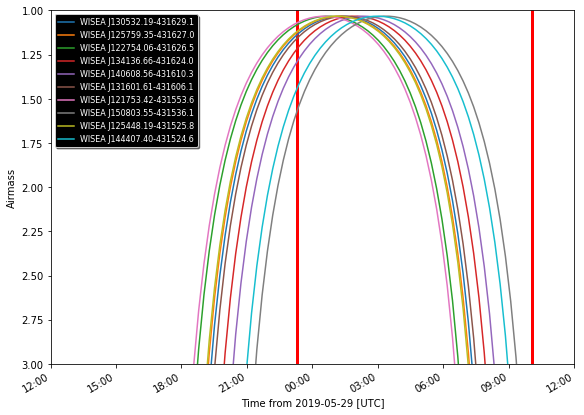

In [71]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5.5) 

fig.tight_layout()

observation_time = Time('2019-05-30')
plot_airmass(top_10, lco, observation_time, style_sheet=dark_style_sheet)

lco_set = lco.twilight_evening_astronomical(observation_time, which='nearest')
lco_rise = lco.twilight_morning_astronomical(observation_time, which='next')

ax.vlines(lco_rise.datetime, 1,3, color='r', linewidth=3)
ax.vlines(lco_set.datetime, 1,3, color='r', linewidth=3)

ax.legend(loc=2, shadow=True, fontsize=8)
plt.show()

# OH NO! We're clounded out. 

Lets examine the same parameters but for a month later. Thanks director!!

In [83]:
#Time range a month later
observation_range2 = Time(["2019-06-15", "2019-06-30"])

#Constrain targets
observing_table2 = observability_table(constraints, lco, list(top_10), time_range = observation_range2)
observing_table2

#Find what is observable and optimize for the longest observation window e.g. our top ten!
mask2 = (observing_table2['ever observable'] == True) & (observing_table2['fraction of time observable'] >= .15)
observable3 = observing_table2[mask2]
observable4 = observable3.to_pandas()
observable4

,target name,ever observable,always observable,fraction of time observable
0,WISEA J130532.19-431629.1,True,False,0.186111
1,WISEA J125759.35-431627.0,True,False,0.180556
2,WISEA J122754.06-431626.5,True,False,0.159722
3,WISEA J134136.66-431624.0,True,False,0.211111
4,WISEA J140608.56-431610.3,True,False,0.212500
5,WISEA J131601.61-431606.1,True,False,0.193056
6,WISEA J121753.42-431553.6,True,False,0.152778
7,WISEA J150803.55-431536.1,True,False,0.233333
8,WISEA J125448.19-431525.8,True,False,0.177778
9,WISEA J144407.40-431524.6,True,False,0.219444


In [84]:
result2 = pd.merge(observable4, quasars, left_on='target name', right_on='name', left_index=True)
result3 = result.drop(['name', 'ever observable', 'always observable'], axis=1)
result3

,target name,fraction of time observable,ra,dec
4,WISEA J130532.19-431629.1,0.270833,13 05 32.20,-43 16 29.2
6,WISEA J125759.35-431627.0,0.265278,12 57 59.36,-43 16 27.1
8,WISEA J122754.06-431626.5,0.244444,12 27 54.07,-43 16 26.5
10,WISEA J134136.66-431624.0,0.295833,13 41 36.67,-43 16 24.1
30,WISEA J140608.56-431610.3,0.283333,14 06 08.57,-43 16 10.4
38,WISEA J131601.61-431606.1,0.277778,13 16 01.62,-43 16 06.2
52,WISEA J121753.42-431553.6,0.237500,12 17 53.43,-43 15 53.7
74,WISEA J150803.55-431536.1,0.259722,15 08 03.56,-43 15 36.2
87,WISEA J125448.19-431525.8,0.262500,12 54 48.19,-43 15 25.9
88,WISEA J144407.40-431524.6,0.277778,14 44 07.41,-43 15 24.6


In [87]:
#Observation dates
dates2 = np.arange('2019-06-15', '2019-06-30', dtype='datetime64[D]')

#Phase of the moon across our dates. Given in rad. 0rad = full moon and pi = new moon.
moon_phase2 = lco.moon_phase(dates2)
moon_phase2

<Quantity [0.50441993, 0.29016899, 0.08412567, 0.13421918, 0.33432467,
           0.53235461, 0.72716788, 0.91928907, 1.10964741, 1.29941667,
           1.4899413 , 1.68266576, 1.87904658, 2.08044284, 2.2879875 ] rad>

In [88]:
moon_position = lco.moon_altaz(dates2)
moon_position

<SkyCoord (AltAz: obstime=['2019-06-15T00:00:00.000000000' '2019-06-16T00:00:00.000000000'
 '2019-06-17T00:00:00.000000000' '2019-06-18T00:00:00.000000000'
 '2019-06-19T00:00:00.000000000' '2019-06-20T00:00:00.000000000'
 '2019-06-21T00:00:00.000000000' '2019-06-22T00:00:00.000000000'
 '2019-06-23T00:00:00.000000000' '2019-06-24T00:00:00.000000000'
 '2019-06-25T00:00:00.000000000' '2019-06-26T00:00:00.000000000'
 '2019-06-27T00:00:00.000000000' '2019-06-28T00:00:00.000000000'
 '2019-06-29T00:00:00.000000000'], location=(1845655.49905341, -5270856.2947176, -3075330.77760682) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, m)
    [( 78.83809533,  48.78027156, 3.76500501e+08),
     ( 90.31276731,  39.29903186, 3.80600232e+08),
     ( 98.62437936,  29.10728712, 3.85116512e+08),
     (105.10382774,  18.66024573, 3.89862290e+08),
     (110.53473612,   8.19091056, 3.94597383e+08),
     (115.41310951,  -2.17904712, 3.99045

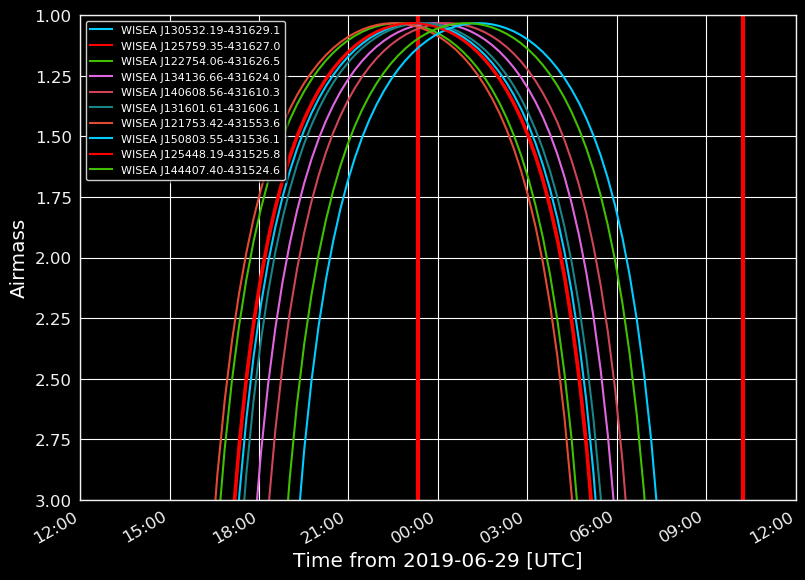

In [90]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5.5) 

fig.tight_layout()

observation_time = Time('2019-06-30')
plot_airmass(top_10, lco, observation_time, style_sheet=dark_style_sheet)

lco_set = lco.twilight_evening_astronomical(observation_time, which='nearest')
lco_rise = lco.twilight_morning_astronomical(observation_time, which='next')

ax.vlines(lco_rise.datetime, 1,3, color='r', linewidth=3)
ax.vlines(lco_set.datetime, 1,3, color='r', linewidth=3)

ax.legend(loc=2, shadow=True, fontsize=8)
plt.show()